In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (roc_auc_score, average_precision_score, f1_score, 
                           precision_score, recall_score, confusion_matrix, 
                           classification_report, roc_curve, precision_recall_curve)
from imblearn.over_sampling import SMOTE
import warnings
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score, silhouette_samples
import re
from collections import Counter
warnings.filterwarnings('ignore')

**Data Understanding & EDA - Dariya**

In [5]:
df_hotels = pd.read_csv("hotels_dataset.csv")
df_hotels

,hotel_id,hotel_name,city,district_category,distance_to_center,distance_to_airport_km,price_per_night,room_type_used_for_price,refundable,overall_rating,...,has_room_service,has_airport_shuttle,has_24h_front_desk,has_non_smoking_rooms,has_family_rooms,has_pet_friendly,has_elevator,number_of_reviews,check_in_time,check_out_time
0,1,"The Ritz-Carlton, Almaty",Almaty,Bostandyk,3.0,18.0,450000,Deluxe King,True,9,...,True,True,True,True,True,True,True,1200,15:00,12:00
1,2,InterContinental Almaty,Almaty,Bostandyk,2.0,17.0,220000,Superior King,True,"8,7",...,True,True,True,True,True,False,True,950,14:00,12:00
2,3,Rahat Palace Hotel,Almaty,Bostandyk,3.5,19.0,130000,Standard Double,True,"8,6",...,True,False,True,True,True,False,True,900,14:00,12:00
3,4,Swissôtel Wellness Resort Alatau Almaty,Almaty,Bostandyk,12.0,25.0,180000,Superior King,True,"9,1",...,True,True,True,True,True,True,True,400,15:00,12:00
4,5,DoubleTree by Hilton Almaty,Almaty,Almaly,1.5,16.0,120000,King Guest Room,True,"7,9",...,True,False,True,True,True,True,True,800,14:00,12:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312,314,Lafayette Hotel,Shymkent,central,"1,5",14,25000,standard_double,True,"6,6",...,True,True,True,True,True,False,True,210,14:00,12:00
313,315,Askar Hotel,Shymkent,near_center,"3,9",10,15500,standard_double,False,"7,2",...,False,False,False,True,False,False,False,40,13:00,12:00
314,316,OrdaBasy Hotel,Shymkent,central,"0,9",13,20000,standard_double,True,"3,6",...,True,False,True,True,True,False,True,115,14:00,12:00
315,317,Bellagio Boutique Inn,Shymkent,residential,"4,9","9,5",18500,standard_double,False,"8,9",...,False,False,False,True,False,False,False,55,13:00,12:00


In [3]:
df_hotels.shape

(317, 38)

In [4]:
df_hotels.head()

,hotel_id,hotel_name,city,district_category,distance_to_center,distance_to_airport_km,price_per_night,room_type_used_for_price,refundable,overall_rating,...,has_room_service,has_airport_shuttle,has_24h_front_desk,has_non_smoking_rooms,has_family_rooms,has_pet_friendly,has_elevator,number_of_reviews,check_in_time,check_out_time
0,1,"The Ritz-Carlton, Almaty",Almaty,Bostandyk,3.0,18.0,450000,Deluxe King,True,9,...,True,True,True,True,True,True,True,1200,15:00,12:00
1,2,InterContinental Almaty,Almaty,Bostandyk,2.0,17.0,220000,Superior King,True,"8,7",...,True,True,True,True,True,False,True,950,14:00,12:00
2,3,Rahat Palace Hotel,Almaty,Bostandyk,3.5,19.0,130000,Standard Double,True,"8,6",...,True,False,True,True,True,False,True,900,14:00,12:00
3,4,Swissôtel Wellness Resort Alatau Almaty,Almaty,Bostandyk,12.0,25.0,180000,Superior King,True,"9,1",...,True,True,True,True,True,True,True,400,15:00,12:00
4,5,DoubleTree by Hilton Almaty,Almaty,Almaly,1.5,16.0,120000,King Guest Room,True,"7,9",...,True,False,True,True,True,True,True,800,14:00,12:00


In [5]:
## 2. Data Understanding
##The dataset contains information about hotels in Kazakhstan.
##Each row represents a single hotel, and each column describes hotel characteristics, pricing, location, or amenities.
##The dataset consists of **317 rows** and **38 columns**.


In [6]:
df_hotels.dtypes

hotel_id                     int64
hotel_name                  object
city                        object
district_category           object
distance_to_center          object
distance_to_airport_km      object
price_per_night              int64
room_type_used_for_price    object
refundable                    bool
overall_rating              object
rating_staff                object
rating_cleanliness          object
rating_comfort              object
rating_facilities           object
rating_location             object
rating_value                object
rating_wifi                 object
number_of_rooms              int64
stars                        int64
has_free_wifi                 bool
has_breakfast                 bool
has_parking                   bool
has_air_conditioning          bool
has_pool                      bool
has_spa                       bool
has_fitness_center            bool
has_restaurant                bool
has_bar                       bool
has_room_service    

In [31]:
cols_to_convert = [
    "distance_to_center",
    "distance_to_airport_km",
    "overall_rating",
    "rating_staff",
    "rating_cleanliness",
    "rating_comfort",
    "rating_facilities",
    "rating_location",
    "rating_value",
    "rating_wifi"
]

for col in cols_to_convert:
    df_hotels[col] = df_hotels[col].str.replace(",", ".", regex=False).astype(float)

In [33]:
df_hotels[cols_to_convert].dtypes

distance_to_center        float64
distance_to_airport_km    float64
overall_rating            float64
rating_staff              float64
rating_cleanliness        float64
rating_comfort            float64
rating_facilities         float64
rating_location           float64
rating_value              float64
rating_wifi               float64
dtype: object

In [9]:
df_hotels.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317 entries, 0 to 316
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   hotel_id                  317 non-null    int64  
 1   hotel_name                317 non-null    object 
 2   city                      317 non-null    object 
 3   district_category         317 non-null    object 
 4   distance_to_center        317 non-null    float64
 5   distance_to_airport_km    317 non-null    float64
 6   price_per_night           317 non-null    int64  
 7   room_type_used_for_price  317 non-null    object 
 8   refundable                317 non-null    bool   
 9   overall_rating            316 non-null    float64
 10  rating_staff              316 non-null    float64
 11  rating_cleanliness        316 non-null    float64
 12  rating_comfort            316 non-null    float64
 13  rating_facilities         316 non-null    float64
 14  rating_loc

In [10]:
df_hotels.isnull().sum().sort_values(ascending=False)


rating_wifi                 2
rating_cleanliness          1
rating_facilities           1
rating_value                1
overall_rating              1
rating_staff                1
rating_location             1
rating_comfort              1
has_fitness_center          0
has_restaurant              0
has_bar                     0
has_room_service            0
has_airport_shuttle         0
hotel_id                    0
has_pool                    0
has_24h_front_desk          0
has_non_smoking_rooms       0
has_family_rooms            0
has_pet_friendly            0
has_elevator                0
number_of_reviews           0
check_in_time               0
has_spa                     0
has_free_wifi               0
has_air_conditioning        0
has_parking                 0
has_breakfast               0
hotel_name                  0
stars                       0
number_of_rooms             0
refundable                  0
room_type_used_for_price    0
price_per_night             0
distance_t

In [11]:
df_hotels.isnull().mean().sort_values(ascending=False) * 100


rating_wifi                 0.630915
rating_cleanliness          0.315457
rating_facilities           0.315457
rating_value                0.315457
overall_rating              0.315457
rating_staff                0.315457
rating_location             0.315457
rating_comfort              0.315457
has_fitness_center          0.000000
has_restaurant              0.000000
has_bar                     0.000000
has_room_service            0.000000
has_airport_shuttle         0.000000
hotel_id                    0.000000
has_pool                    0.000000
has_24h_front_desk          0.000000
has_non_smoking_rooms       0.000000
has_family_rooms            0.000000
has_pet_friendly            0.000000
has_elevator                0.000000
number_of_reviews           0.000000
check_in_time               0.000000
has_spa                     0.000000
has_free_wifi               0.000000
has_air_conditioning        0.000000
has_parking                 0.000000
has_breakfast               0.000000
h

In [12]:
df_hotels.duplicated().sum()


0

In [13]:
df_hotels["hotel_id"].duplicated().sum()


0

In [14]:
### 3.2 Duplicate Records
##Проверка на наличие дубликатов проводилась как с использованием сравнения полных строк, так и с помощью идентификаторов отелей.
##Значительных дубликатов обнаружено не было, что подтверждает согласованность данных.

In [15]:
##Exploratory Data Analysis (EDA)


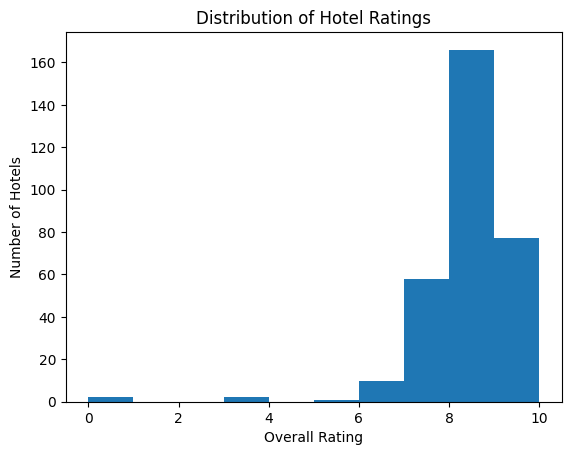

In [16]:
plt.figure()
plt.hist(df_hotels["overall_rating"], bins=10)
plt.xlabel("Overall Rating")
plt.ylabel("Number of Hotels")
plt.title("Distribution of Hotel Ratings")
plt.show()


In [17]:
## 4. Exploratory Data Analysis

### 4.1 Distribution of Hotel Ratings

##Most hotels have ratings concentrated in the higher range (8–10),
##indicating generally positive customer satisfaction levels.


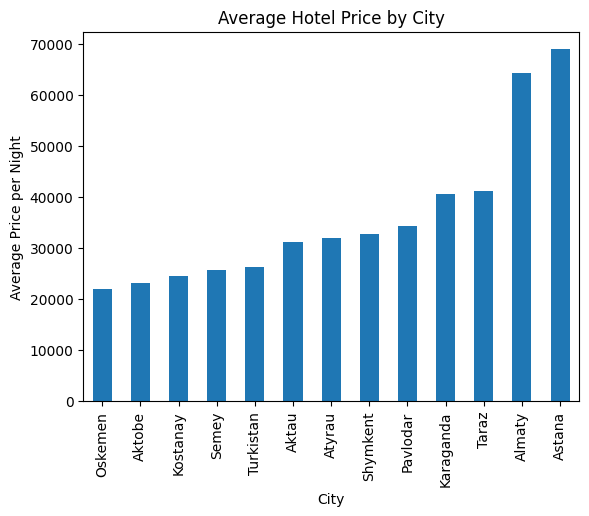

In [18]:
avg_price_city = df_hotels.groupby("city")["price_per_night"].mean().sort_values()

plt.figure()
avg_price_city.plot(kind="bar")
plt.xlabel("City")
plt.ylabel("Average Price per Night")
plt.title("Average Hotel Price by City")
plt.show()


In [19]:
### 4.2 Price Distribution by City
##Hotel prices vary significantly across cities.
##Major cities tend to have higher average prices, reflecting higher demand and service expectations.

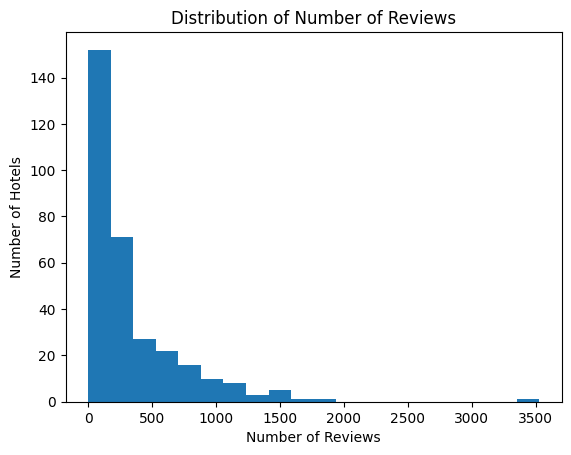

In [20]:
plt.figure()
plt.hist(df_hotels["number_of_reviews"], bins=20)
plt.xlabel("Number of Reviews")
plt.ylabel("Number of Hotels")
plt.title("Distribution of Number of Reviews")
plt.show()

In [21]:
### 4.3 Number of Reviews

##Most hotels have a moderate number of reviews,while a small number of hotels receive significantly higher customer attention.


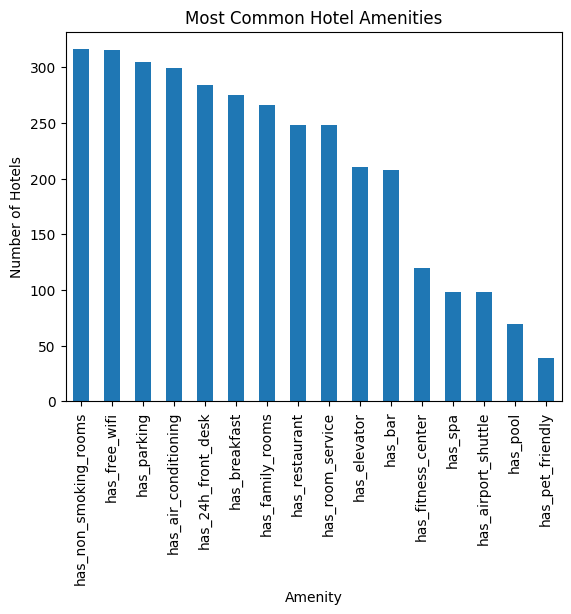

In [22]:
amenities_cols = [col for col in df_hotels.columns if col.startswith("has_")]

amenities_count = df_hotels[amenities_cols].sum().sort_values(ascending=False)

plt.figure()
amenities_count.plot(kind="bar")
plt.xlabel("Amenity")
plt.ylabel("Number of Hotels")
plt.title("Most Common Hotel Amenities")
plt.show()


**Text data preparation(reviews) - Amina**

In [78]:
df_reviews = pd.read_csv("reviews_dataset.csv")
df_reviews

,hotel_id,review_text_positive,review_text_negative,review_score,traveler_type
0,1,"""Location, facilities, room and staff were all...","""Property needs more bi-lingual staff to cater...",10,Couple
1,1,"""The staff were very nice. The cleaning lady G...","""it is overpriced for Kazakhstan.""",9,Business-taveler
2,1,"""Proximity to our daughter who is studying at ...","""Not a dislike - rather constructive criticism...",9,Family
3,1,"""Our favorite part about the hotel was the vie...","""The hotel looks a bit old and tired. Could us...",7,Couple
4,1,"""Comfortable room and view not enough amenities""","""Garbage you locked the mini bar on valentine ...",3,Couple
...,...,...,...,...,...
1822,253,"""Friendly and multilingual staff available at ...","""Limited privacy due to hostel-style accommoda...",7,Business-taveler
1823,253,"""Shared kitchen is well equipped, convenient f...","""Noise can be heard from common areas late in ...",8,Business-taveler
1824,253,"""Clean rooms and common areas, housekeeping is...","""Convenience store selection is quite basic.""",8,Business-taveler
1825,253,"""Stable and fast Wi-Fi, worked well in rooms a...","""Microwaves are shared, sometimes have to wait...",7,Family


In [39]:
df_reviews.shape

(1827, 5)

In [40]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1827 entries, 0 to 1826
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   hotel_id              1827 non-null   int64 
 1   review_text_positive  1825 non-null   object
 2   review_text_negative  1827 non-null   object
 3   review_score          1827 non-null   object
 4   traveler_type         1827 non-null   object
dtypes: int64(1), object(4)
memory usage: 71.5+ KB


In [80]:
df_reviews.describe(include="object")

,review_text_positive,review_text_negative,review_score,traveler_type
count,1825,1827,1827,1827
unique,1756,1802,12,10
top,"""Location""","""poor sound insulation""",8,Single
freq,15,4,487,662


Проверка пропусков и дубликатов

In [42]:
df_reviews.isnull().sum()

hotel_id                0
review_text_positive    2
review_text_negative    0
review_score            0
traveler_type           0
dtype: int64

In [44]:
df_reviews = df_reviews.dropna(subset=["review_text_positive", "review_text_negative"])

In [46]:
df_reviews.isnull().sum()

hotel_id                0
review_text_positive    0
review_text_negative    0
review_score            0
traveler_type           0
dtype: int64

In [48]:
df_reviews.duplicated().sum()

2

In [52]:
df_reviews = df_reviews.drop_duplicates()

Объединение положительных и отрицательных отзывов

In [98]:
df_reviews["full_review"] = (
    df_reviews["review_text_positive"].fillna("") + " " +
    df_reviews["review_text_negative"].fillna("")
)

In [100]:
df_reviews[["review_text_positive", "review_text_negative", "full_review"]].head()

,review_text_positive,review_text_negative,full_review
0,"""Location, facilities, room and staff were all...","""Property needs more bi-lingual staff to cater...","""Location, facilities, room and staff were all..."
1,"""The staff were very nice. The cleaning lady G...","""it is overpriced for Kazakhstan.""","""The staff were very nice. The cleaning lady G..."
2,"""Proximity to our daughter who is studying at ...","""Not a dislike - rather constructive criticism...","""Proximity to our daughter who is studying at ..."
3,"""Our favorite part about the hotel was the vie...","""The hotel looks a bit old and tired. Could us...","""Our favorite part about the hotel was the vie..."
4,"""Comfortable room and view not enough amenities""","""Garbage you locked the mini bar on valentine ...","""Comfortable room and view not enough amenitie..."


Базовые характеристики текста

In [102]:
df_reviews["review_length_chars"] = df_reviews["full_review"].str.len()
df_reviews["review_length_chars"].describe()

count    1825.000000
mean      185.692603
std       124.526763
min        25.000000
25%       114.000000
50%       149.000000
75%       222.000000
max      1723.000000
Name: review_length_chars, dtype: float64

In [60]:
df_reviews["review_length_words"] = df_reviews["full_review"].str.split().apply(len)
df_reviews["review_length_words"].describe()

count    1823.000000
mean       31.366978
std        22.703592
min         4.000000
25%        18.000000
50%        24.000000
75%        38.000000
max       301.000000
Name: review_length_words, dtype: float64

In [104]:
df_reviews

,hotel_id,review_text_positive,review_text_negative,review_score,traveler_type,full_review,review_length_chars
0,1,"""Location, facilities, room and staff were all...","""Property needs more bi-lingual staff to cater...",10.0,Couple,"""Location, facilities, room and staff were all...",134
1,1,"""The staff were very nice. The cleaning lady G...","""it is overpriced for Kazakhstan.""",9.0,Business-taveler,"""The staff were very nice. The cleaning lady G...",200
2,1,"""Proximity to our daughter who is studying at ...","""Not a dislike - rather constructive criticism...",9.0,Family,"""Proximity to our daughter who is studying at ...",379
3,1,"""Our favorite part about the hotel was the vie...","""The hotel looks a bit old and tired. Could us...",7.0,Couple,"""Our favorite part about the hotel was the vie...",520
4,1,"""Comfortable room and view not enough amenities""","""Garbage you locked the mini bar on valentine ...",3.0,Couple,"""Comfortable room and view not enough amenitie...",226
...,...,...,...,...,...,...,...
1822,253,"""Friendly and multilingual staff available at ...","""Limited privacy due to hostel-style accommoda...",7.0,Business-taveler,"""Friendly and multilingual staff available at ...",120
1823,253,"""Shared kitchen is well equipped, convenient f...","""Noise can be heard from common areas late in ...",8.0,Business-taveler,"""Shared kitchen is well equipped, convenient f...",133
1824,253,"""Clean rooms and common areas, housekeeping is...","""Convenience store selection is quite basic.""",8.0,Business-taveler,"""Clean rooms and common areas, housekeeping is...",105
1825,253,"""Stable and fast Wi-Fi, worked well in rooms a...","""Microwaves are shared, sometimes have to wait...",7.0,Family,"""Stable and fast Wi-Fi, worked well in rooms a...",125


Очистка текста (Text Cleaning)

In [94]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"[^a-zа-яё\s]", "", text)
    text = re.sub(r"\s+", " ", text)
    return text.strip()

In [106]:
df_reviews["clean_review"] = df_reviews["full_review"].apply(clean_text)
df_reviews[["full_review", "clean_review"]].head()

,full_review,clean_review
0,"""Location, facilities, room and staff were all...",location facilities room and staff were all ex...
1,"""The staff were very nice. The cleaning lady G...",the staff were very nice the cleaning lady gul...
2,"""Proximity to our daughter who is studying at ...",proximity to our daughter who is studying at k...
3,"""Our favorite part about the hotel was the vie...",our favorite part about the hotel was the view...
4,"""Comfortable room and view not enough amenitie...",comfortable room and view not enough amenities...


Проверка языка отзывов

In [67]:
def detect_language_simple(text):
    if re.search(r"[а-яА-ЯёЁ]", text):
        return "ru"
    elif re.search(r"[a-zA-Z]", text):
        return "en"
    else:
        return "other"

In [69]:
df_reviews["language"] = df_reviews["clean_review"].apply(detect_language_simple)
df_reviews["language"].value_counts()

language
en    1815
ru       8
Name: count, dtype: int64

Фильтрация по языку

In [71]:
df_reviews = df_reviews[df_reviews["language"].isin(["ru", "en"])]

In [74]:
df_reviews.head(5)

,hotel_id,review_text_positive,review_text_negative,review_score,traveler_type,full_review,review_length_chars,review_length_words,clean_review,language
0,1,"""Location, facilities, room and staff were all...","""Property needs more bi-lingual staff to cater...",10,Couple,"""Location, facilities, room and staff were all...",134,18,location facilities room and staff were all ex...,en
1,1,"""The staff were very nice. The cleaning lady G...","""it is overpriced for Kazakhstan.""",9,Business-taveler,"""The staff were very nice. The cleaning lady G...",200,35,the staff were very nice the cleaning lady gul...,en
2,1,"""Proximity to our daughter who is studying at ...","""Not a dislike - rather constructive criticism...",9,Family,"""Proximity to our daughter who is studying at ...",379,58,proximity to our daughter who is studying at k...,en
3,1,"""Our favorite part about the hotel was the vie...","""The hotel looks a bit old and tired. Could us...",7,Couple,"""Our favorite part about the hotel was the vie...",520,90,our favorite part about the hotel was the view...,en
4,1,"""Comfortable room and view not enough amenities""","""Garbage you locked the mini bar on valentine ...",3,Couple,"""Comfortable room and view not enough amenitie...",226,41,comfortable room and view not enough amenities...,en


Агрегация отзывов по отелю

In [84]:
df_reviews["review_score"].dtype

dtype('O')

In [86]:
df_reviews["review_score"] = pd.to_numeric(
    df_reviews["review_score"],
    errors="coerce"
)

In [88]:
df_reviews["review_score"].isna().sum()

2

In [90]:
df_reviews = df_reviews.dropna(subset=["review_score"])

In [108]:
reviews_agg = (
    df_reviews
    .groupby("hotel_id")
    .agg(
        aggregated_reviews=("clean_review", " ".join),
        avg_review_score=("review_score", "mean"),
        num_reviews=("clean_review", "count")
    )
    .reset_index()
)

In [110]:
reviews_agg.head()

,hotel_id,aggregated_reviews,avg_review_score,num_reviews
0,1,location facilities room and staff were all ex...,6.500000,6
1,2,the location and nature are perfect pool floor...,7.571429,7
2,3,the room was spatious really tidy and clean lo...,6.714286,7
3,4,amazing location greenish yard best one so far...,7.142857,7
4,5,loved the pool and that it had a special pool ...,6.857143,7


Анализ типа путешественников

In [88]:
df_reviews["traveler_type"].value_counts()

traveler_type
Single                 660
Family                 494
Couple                 489
Group                   80
Business-traveler       51
Business-taveler        28
family                  10
single                   7
Business Travelers       1
Businnes traveler        1
Name: count, dtype: int64

In [114]:
df_reviews["traveler_type_clean"] = (
    df_reviews["traveler_type"]
    .str.lower()
    .str.strip()
)

In [116]:
df_reviews["traveler_type_clean"].value_counts()

traveler_type_clean
single                667
family                506
couple                491
group                  80
business-traveler      51
business-taveler       28
business travelers      1
businnes traveler       1
Name: count, dtype: int64

In [92]:
traveler_type_mapping = {
    "single": "Single",
    "family": "Family",
    "couple": "Couple",
    "group": "Group",

    "business-traveler": "Business",
    "business traveler": "Business",
    "business travelers": "Business",
    "businnes traveler": "Business",
    "business-taveler": "Business"
}

In [94]:
df_reviews["traveler_type_standardized"] = (
    df_reviews["traveler_type_clean"]
    .replace(traveler_type_mapping)
)

In [97]:
df_reviews["traveler_type_standardized"].value_counts()

traveler_type_standardized
Single      667
Family      504
Couple      489
Business     81
Group        80
Name: count, dtype: int64

In [118]:
df_reviews = df_reviews.drop(columns=["traveler_type", "traveler_type_clean"])

In [120]:
df_reviews.head(5)

,hotel_id,review_text_positive,review_text_negative,review_score,full_review,review_length_chars,clean_review
0,1,"""Location, facilities, room and staff were all...","""Property needs more bi-lingual staff to cater...",10.0,"""Location, facilities, room and staff were all...",134,location facilities room and staff were all ex...
1,1,"""The staff were very nice. The cleaning lady G...","""it is overpriced for Kazakhstan.""",9.0,"""The staff were very nice. The cleaning lady G...",200,the staff were very nice the cleaning lady gul...
2,1,"""Proximity to our daughter who is studying at ...","""Not a dislike - rather constructive criticism...",9.0,"""Proximity to our daughter who is studying at ...",379,proximity to our daughter who is studying at k...
3,1,"""Our favorite part about the hotel was the vie...","""The hotel looks a bit old and tired. Could us...",7.0,"""Our favorite part about the hotel was the vie...",520,our favorite part about the hotel was the view...
4,1,"""Comfortable room and view not enough amenities""","""Garbage you locked the mini bar on valentine ...",3.0,"""Comfortable room and view not enough amenitie...",226,comfortable room and view not enough amenities...


**Feature Engineering + Target Definition - Aiya**

количество удобств

In [43]:
amenity_columns=[
    "has_free_wifi",
    "has_breakfast",
    "has_parking",
    "has_air_conditioning",
    "has_pool",
    "has_spa",
    "has_fitness_center",
    "has_restaurant",
    "has_bar",
    "has_room_service",
    "has_airport_shuttle",
    "has_24h_front_desk",
    "has_non_smoking_rooms",
    "has_family_rooms",
    "has_pet_friendly",
    "has_elevator"
]
df_hotels["amenities_count"]=df_hotels[amenity_columns].sum(axis=1)
df_hotels[amenity_columns+["amenities_count"]].head()

,has_free_wifi,has_breakfast,has_parking,has_air_conditioning,has_pool,has_spa,has_fitness_center,has_restaurant,has_bar,has_room_service,has_airport_shuttle,has_24h_front_desk,has_non_smoking_rooms,has_family_rooms,has_pet_friendly,has_elevator,amenities_count
0,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,15
1,True,False,True,True,True,True,True,True,True,True,True,True,True,True,False,True,14
2,True,True,True,True,True,True,True,True,True,True,False,True,True,True,False,True,14
3,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,16
4,True,False,True,True,True,True,True,True,True,True,False,True,True,True,True,True,14


классы качества (low / medium / high)

In [37]:
def service_quality_class(rating):
    if rating < 6:
        return "Low"
    elif rating < 8.5:
        return "Medium"
    else:
        return "High"


df_hotels["service_quality_class"] = df_hotels["overall_rating"].apply(service_quality_class)
df_hotels[["overall_rating", "service_quality_class"]].head()


,overall_rating,service_quality_class
0,9.0,High
1,8.7,High
2,8.6,High
3,9.1,High
4,7.9,Medium


In [39]:
df_hotels["service_quality_class"].value_counts()

service_quality_class
High      160
Medium    152
Low         5
Name: count, dtype: int64

Средняя оценка по всем аспектам сервиса

In [55]:
aspect_columns=[
    "rating_staff",
    "rating_cleanliness",
    "rating_comfort",
    "rating_facilities",
    "rating_location",
    "rating_value",
    "rating_wifi"
]
df_hotels[aspect_columns] = df_hotels[aspect_columns].apply(
    pd.to_numeric, errors="coerce"
)

df_hotels["avg_aspect_rating"] = df_hotels[aspect_columns].mean(axis=1)
df_hotels[["hotel_id","avg_aspect_rating"]].head()

,hotel_id,avg_aspect_rating
0,1,9.085714
1,2,8.657143
2,3,8.771429
3,4,9.128571
4,5,8.200000


In [62]:
df_hotels["rating_gap"] = df_hotels["overall_rating"] - df_hotels["avg_aspect_rating"]
df_hotels[["hotel_id","overall_rating","avg_aspect_rating","rating_gap"]]

,hotel_id,overall_rating,avg_aspect_rating,rating_gap
0,1,9.0,9.085714,-0.085714
1,2,8.7,8.657143,0.042857
2,3,8.6,8.771429,-0.171429
3,4,9.1,9.128571,-0.028571
4,5,7.9,8.200000,-0.300000
...,...,...,...,...
312,314,6.6,5.714286,0.885714
313,315,7.2,7.785714,-0.585714
314,316,3.6,3.914286,-0.314286
315,317,8.9,7.971429,0.928571


The "rating_gap" attribute shows the difference between the overall rating of the hotel and the average rating for certain aspects of the service. Values close to zero indicate the consistency of the overall guest experience with the assessment of specific service characteristics.
> The guests are satisfied than expected → >0, 
< 0 → service is worse than expected
However, values close to zero indicate consistency in the overall impression of the guests


In [72]:
df_hotels[
    [
        "amenities_count",
        "overall_rating",
        "avg_aspect_rating",
        "service_quality_class"
    ]
].isna().sum()

amenities_count          0
overall_rating           1
avg_aspect_rating        1
service_quality_class    0
dtype: int64

In [74]:
df_hotels = df_hotels.dropna(
    subset=["overall_rating", "avg_aspect_rating"]
)

In [76]:
df_hotels[
    [
        "amenities_count",
        "overall_rating",
        "avg_aspect_rating",
        "service_quality_class"
    ]
].isna().sum()

amenities_count          0
overall_rating           0
avg_aspect_rating        0
service_quality_class    0
dtype: int64

In [122]:
df_hotels=df_hotels.merge(
    reviews_agg[["hotel_id", "avg_review_score","num_reviews"]],
    on="hotel_id",
    how="left"
)
df_hotels[["hotel_id", "avg_review_score", "num_reviews"]].head()


,hotel_id,avg_review_score,num_reviews
0,1,6.500000,6.0
1,2,7.571429,7.0
2,3,6.714286,7.0
3,4,7.142857,7.0
4,5,6.857143,7.0


In [124]:
df_hotels[["avg_review_score", "num_reviews"]].isna().sum()

avg_review_score    13
num_reviews         13
dtype: int64

In [126]:
df_hotels["num_reviews"] = df_hotels["num_reviews"].fillna(0)
df_hotels["avg_review_score"] = df_hotels["avg_review_score"].fillna(df_hotels["avg_review_score"].mean())


In [132]:
df_hotels.groupby("service_quality_class")[
    ["amenities_count", "avg_review_score", "num_reviews"]
].mean()

,amenities_count,avg_review_score,num_reviews
service_quality_class,,,
High,11.245283,7.285692,5.754717
Low,11.600000,6.125771,1.200000
Medium,10.177632,7.027097,5.901316


In [136]:
features_df = df_hotels[
    [
        "hotel_id",
        "amenities_count",
        "num_reviews",
        "avg_review_score",
        "avg_aspect_rating",
        "rating_gap",
        "service_quality_class"
    ]
]

features_df


,hotel_id,amenities_count,num_reviews,avg_review_score,avg_aspect_rating,rating_gap,service_quality_class
0,1,15,6.0,6.500000,9.085714,-0.085714,High
1,2,14,7.0,7.571429,8.657143,0.042857,High
2,3,14,7.0,6.714286,8.771429,-0.171429,High
3,4,16,7.0,7.142857,9.128571,-0.028571,High
4,5,14,7.0,6.857143,8.200000,-0.300000,Medium
...,...,...,...,...,...,...,...
311,314,13,3.0,6.333333,5.714286,0.885714,Medium
312,315,4,4.0,6.250000,7.785714,-0.585714,Medium
313,316,11,0.0,7.142951,3.914286,-0.314286,Low
314,317,5,4.0,6.750000,7.971429,0.928571,High


You may notice discrepancies between the aggregated rating of the hotel and the average rating based on reviews, reflecting differences between the overall reputation of the hotel and individual user experiences

As a result of the feature engineering stage, a final features table was formed, in which each row corresponds to one hotel, and the columns represent aggregated characteristics of the service,
infrastructure, and user experience